## Lab 1- Python

Let start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [33]:
import random
import matplotlib.pyplot as plt
x=random.random()
print "The Value of x is", x

The Value of x is 0.611103094784


### Exercise 1.1
Using random, write a function GenerateData(N, mymin, mymax), that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [34]:
# Skeleton
def GenerateData(N,min,max):
    out = []
    ### BEGIN SOLUTION
    for i in range(0, N):
        x = random.random()
        out.append(((x * (max - min)) + min))
    ### END SOLUTION
    return out

minRange = -10
maxRange = 10
Data=GenerateData(1000,minRange,maxRange)
print "Data Type:", type(Data)
print "Data Length:", len(Data)
if len(Data)>0: 
    print "Type of Data Contents:", type(Data[0])
    print "Data Minimum:", min(Data)
    print "Data Maximum:", max(Data)

Data Type: <type 'list'>
Data Length: 1000
Type of Data Contents: <type 'float'>
Data Minimum: -9.99464921514
Data Maximum: 9.9485404875


### Exercise 1.2

Write a function that computes the mean of values in a list.

In [35]:
# Skeleton
def mean(Data):
    m=0
    
    ### BEGIN SOLUTION

    for i in Data:
        m += i
    m = (m)/(len(Data))
    
    ### END SOLUTION
    
    return m

print "Mean of Data:", mean(Data)

Mean of Data: -0.100478999267


### Exercise 1.3

Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of positive entries. 

In [36]:
def where(mylist,myfunc):
    out= []
    
    ### BEGIN SOLUTION

    for i in range(0, len(mylist)):
        if myfunc(mylist[i]):
            out.append(i)
    
    ### END SOLUTION
    
    return out

### Exercise 1.4

The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Use this function, in conjunction to your solution to 1.3, to demonstrate that your data is "flat". Hint: pick several sub-ranges and show that the number of data point divided by the size of the range is roughly constant. 

True True False False False
False False True True False
Number of Entries passing F1: 490
Number of Entries passing F2: 0


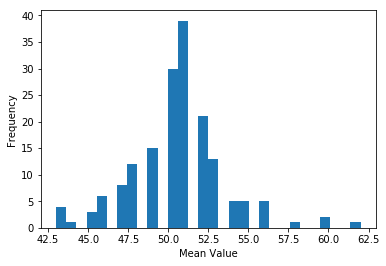

In [37]:
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,10)
F2=inrange(10,20)

print F1(0), F1(1), F1(10), F1(15), F1(20)
print F2(0), F2(1), F2(10), F2(15), F2(20)

print "Number of Entries passing F1:", len(where(Data,F1))
print "Number of Entries passing F2:", len(where(Data,F2))

# Solution:
flatNum = []
for y in range(minRange, maxRange):
    for x in range(minRange, maxRange):
        if (x > y): # to make sure that the 2nd arg passed to the inrage function is "max" while the first is "min"
            checkFunc = inrange(y, x)
            if abs(x-y) > 1: # to always have the range's length at least 2
                flatNum.append(len(where(Data, checkFunc))/abs(x-y))

plt.xlabel("Mean Value")
plt.ylabel("Frequency")
x = range(len(flatNum))
y = flatNum
plt.hist(y, bins=30)
plt.show()

### Exercise 1.5

Repeat Exercise 1.5 using the built in python functions sum and map instead of your solution to 1.3. 

True True False False False
False False True True False
Number of Entries passing F1: 490
Number of Entries passing F2: 0


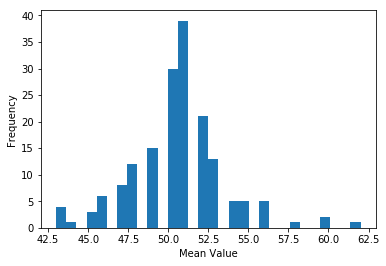

In [38]:
### BEGIN SOLUTION

    # Fill in your solution here   
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,10)
F2=inrange(10,20)

print F1(0), F1(1), F1(10), F1(15), F1(20)
print F2(0), F2(1), F2(10), F2(15), F2(20)

print "Number of Entries passing F1:", len(filter(F1, Data))
print "Number of Entries passing F2:", len(filter(F2, Data))

# Solution:
flatNum = []
for y in range(minRange, maxRange):
    for x in range(minRange, maxRange):
        if (x > y): # to make sure that the 2nd arg passed to the inrage function is "max" while the first is "min"
            checkFunc = inrange(y, x)
            if abs(x-y) > 1: # to always have the range's length at least 2
                flatNum.append(len(filter(checkFunc, Data))/abs(x-y))

plt.xlabel("Mean Value")
plt.ylabel("Frequency")
x = range(len(flatNum))
y = flatNum
plt.hist(y, bins=30)
plt.show()
    
### END SOLUTION

### Exercise 1.6

Write a new function called GenerateDataFromFunction(N,mymin,mymax,myfunc), that instead of generating a flat distribution, generates a distribution with functional form coded in myfunc. Note that myfunc will always be > 0.  

Use your function to generate 1000 numbers that are Gaussian distributed, using the Gaussian function below. Confirm the mean of the data is close to mean you specify when building the Gaussian. 

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  



In [39]:
def func_width(minFunc, maxFunc, func):
    values = []
    for i in range(minFunc, maxFunc):
        values.append(func(i))
    return min(values), max(values)

def GenerateDataFromFunction(N,mymin,mymax,myfunc):
    out = []
    i = 0
    ### BEGIN SOLUTION
    while True:
        test_x = ((random.random() * (mymax-mymin) + mymin))
        minp,maxp=func_width(mymin, mymax, myfunc)
        p = random.random() * (maxp - minp) + minp
        if p <= myfunc(test_x):
            out.append(test_x)
            i += 1
        if i==N:
            break
    
    ### END SOLUTION
    return out


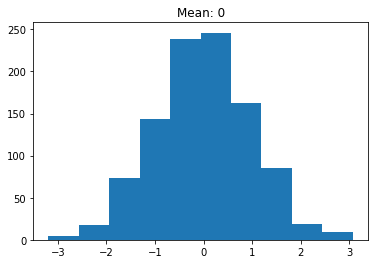

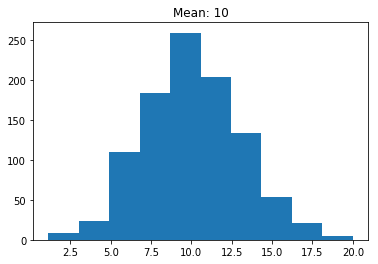

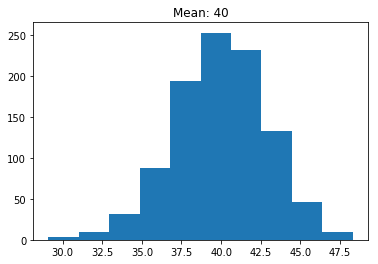

In [41]:
import math

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma)
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)
g3=gaussian(40,3)

### BEGIN SOLUTION
plt.title("Mean: " + str(0))
plt.hist(GenerateDataFromFunction(1000,-100,100,g1))
plt.show()
plt.title("Mean: " + str(10))
plt.hist(GenerateDataFromFunction(1000,0,100,g2))
plt.show()
plt.title("Mean: " + str(40))
plt.hist(GenerateDataFromFunction(1000,0,100,g3))
plt.show()
### END SOLUTION
